In [1]:
import librosa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import IPython.display as ipd
import music21 as m21
import sys
import IPython
from IPython.core.display import display, HTML, Javascript
import json, random

In [2]:
import keras
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, Conv1D, MaxPool1D
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import sequence
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from livelossplot import PlotLossesKeras
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
def envelope(y, n):
    env_pos = []
    env_neg = []

    for i in range(0, len(y), n):
        env_pos += n * [np.max(y[i:(n+i)])]
        env_neg += n * [np.min(y[i:(n+i)])]
        
    return env_pos, env_neg

In [4]:
def frontiers(y, env, k):
    previous = np.array(env)[:-1]
    next = np.array(env)[1:]
    front = np.argwhere((next >= k*previous) & (next > 0.025)).flatten()
    front = np.append(front, len(y[::-1][np.argwhere(y[::-1] >= 0.005)[0][0]:]))
    
    return front

In [5]:
def load_NN(name):
    with open(name + "_NN_architecture.json", 'r') as json_file:
        model = model_from_json(json_file.read())
    model.load_weights(name + "_NN_weights.h5")
    model.summary()
    return model

In [6]:
def round_dur(x, base):
    return base * round(x/base)

## String detection

In [22]:
string_model = load_NN("../Single_note_models/Guitar/Guitar_string")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               128256    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1032      
Total params: 162,184
Trainable params: 162,184
Non-trainable params: 0
_________________________________________________________________


In [23]:
y, sr = librosa.load("../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", mono=False)
y = librosa.core.to_mono(y)
y = librosa.resample(y, sr, 8000)

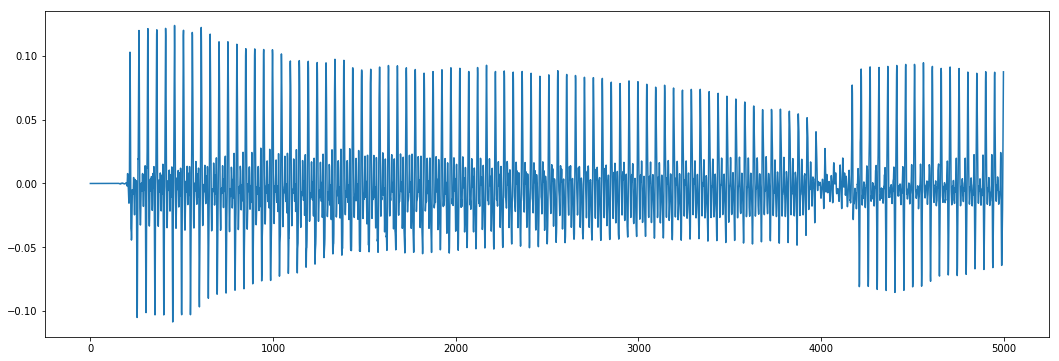

In [24]:
plt.figure(figsize=(18,6))
plt.plot(y[:5000])

In [25]:
note_0 = y[:4000]

In [26]:
w_0 = abs(np.fft.fft(note_0, n=1000))
freqs_0 = np.fft.fftfreq(len(w_0))
note_0_string_data = pd.DataFrame({"x{}".format(j): [w_0[freqs_0 >= 0][j]] for j in range(500)})

In [27]:
np.argmax(string_model.predict(note_0_string_data)) + 1

5

In [28]:
total = string_model.get_weights()[0].dot(string_model.get_weights()[2]).dot(string_model.get_weights()[4])

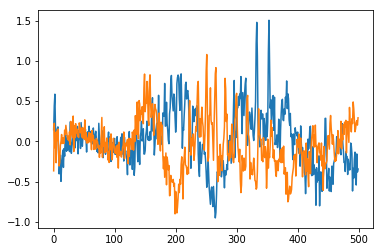

In [29]:
plt.plot(total[:,3])
plt.plot(total[:,4])

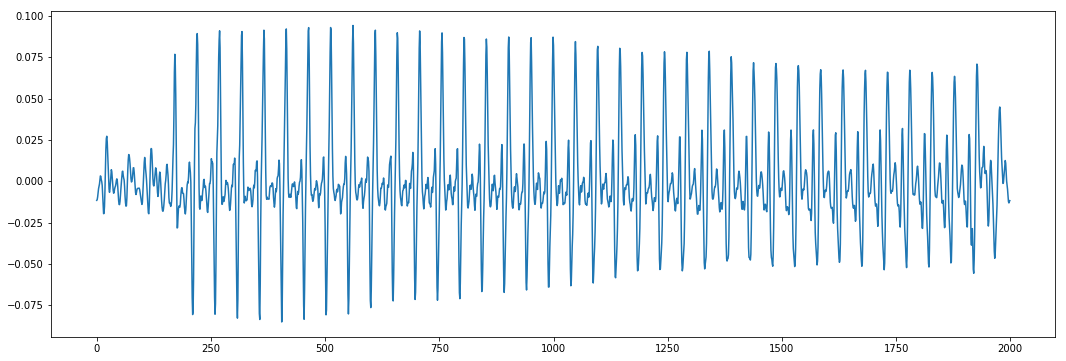

In [30]:
plt.figure(figsize=(18,6))
plt.plot(y[4000:6000])

In [31]:
note_1 = y[4000:6000]

In [32]:
w_1 = abs(np.fft.fft(note_1, n=1000))
freqs_1 = np.fft.fftfreq(len(w_1))
note_1_string_data = pd.DataFrame({"x{}".format(j): [w_1[freqs_1 >= 0][j]] for j in range(500)})

In [33]:
np.argmax(string_model.predict(note_1_string_data)) + 1

4

In [19]:
string_model.predict(note_1_string_data)

array([[0.03627637, 0.05737116, 0.06220109, 0.6945601 , 0.1228214 ,
        0.02060116, 0.00215958, 0.00400908]], dtype=float32)

In [35]:
for i in range(0, 2000, 10):
    note = y[4000+i:4500+i]
    w = abs(np.fft.fft(note, n=1000))
    freqs = np.fft.fftfreq(len(w))
    note_string_data = pd.DataFrame({"x{}".format(j): [w[freqs_1 >= 0][j]] for j in range(500)})
    print(np.argmax(string_model.predict(note_1_string_data)) + 1)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


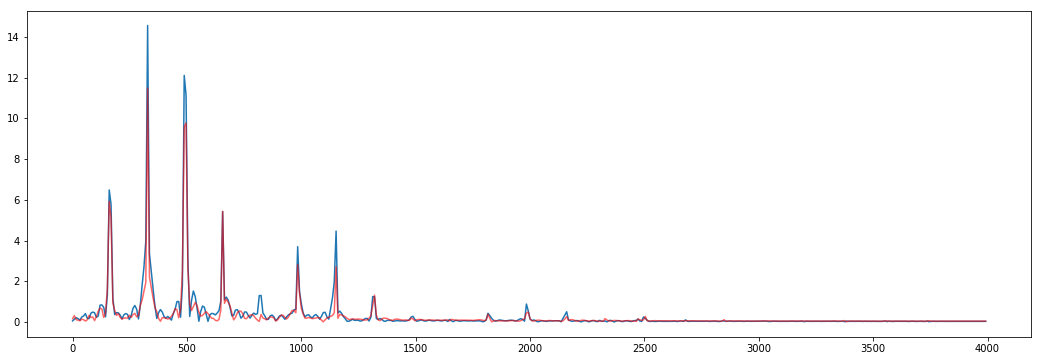

In [98]:
plt.figure(figsize=(18,6))
plt.plot(8000*freqs_0[freqs_0 >= 0], w_0[freqs_0 >= 0])
plt.plot(8000*freqs_1[freqs_1 >= 0], w_1[freqs_1 >= 0], 'r', alpha=.6)

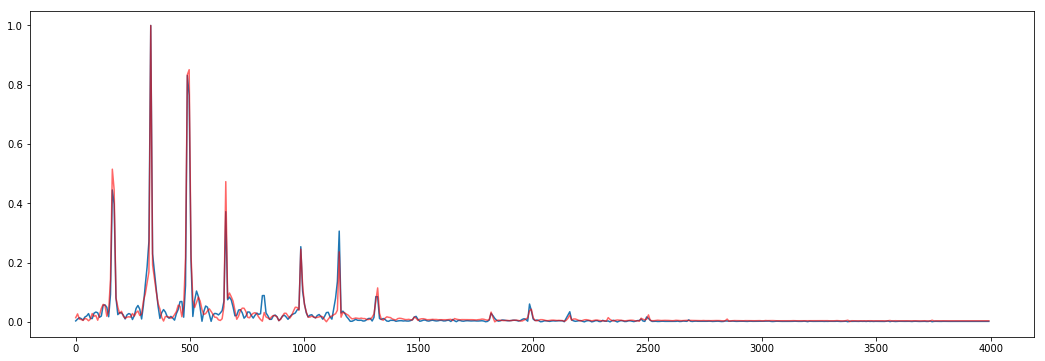

In [99]:
plt.figure(figsize=(18,6))
plt.plot(8000*freqs_0[freqs_0 >= 0], w_0[freqs_0 >= 0]/np.max(w_0))
plt.plot(8000*freqs_1[freqs_1 >= 0], w_1[freqs_1 >= 0]/np.max(w_1), 'r', alpha=.6)

## Norm string detection

In [101]:
norm_string_model = load_NN("../Single_note_models/Guitar/Guitar_norm_string")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               128256    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 1032      
Total params: 162,184
Trainable params: 162,184
Non-trainable params: 0
_________________________________________________________________


In [102]:
w_0 = abs(np.fft.fft(note_0, n=1000))
freqs_0 = np.fft.fftfreq(len(w_0))
note_0_string_data = pd.DataFrame({"x{}".format(j): [w_0[freqs_0 >= 0][j]]/np.max(w_0) for j in range(500)})

In [103]:
np.argmax(string_model.predict(note_0_string_data)) + 1

4